# 🚗 Electric Vehicle Sales Analysis & Forecasting

### 🔍 Objective:
The aim of this project is to explore and analyze electric vehicle (EV) sales data across different states, understand trends, and build a predictive model to forecast EV sales. This will help stakeholders make data-driven decisions in areas like marketing, pricing, and policy-making.

### 📈 Project Workflow:
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Building using Gradient Boosting
5. Model Evaluation
6. Insights & Recommendations

---

### 🗒️ Importing Required Libraries
This cell imports essential Python libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), model training (`GradientBoostingRegressor` from sklearn), and preprocessing tasks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


---

### 📥 Loading the Dataset
Loads the Electric Vehicle sales dataset from a CSV or similar source into a pandas DataFrame for further processing.


In [2]:

df = pd.read_csv('Electric Vehicle Sales by State in India.csv')


---

### 📊 Exploratory Data Analysis (EDA)
These cells explore the dataset through descriptive statistics and visualizations to understand variable distributions, detect outliers, and identify trends in EV sales.
- Visualizations like histograms, bar charts, and box plots are used.
- Correlation matrices help in identifying important relationships between features.


In [3]:

print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Columns and types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())


Dataset shape: (96845, 8)
First 5 rows:
      Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  
Columns and types:
 Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type  

---

### ⚙️One-Hot Encoding
Applying one-hot encoding to convert categorical features into numerical format for PCA  

In [4]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Extract detailed datetime features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)
df['IsQuarterStart'] = df['Date'].dt.is_quarter_start.astype(int)
df['IsQuarterEnd'] = df['Date'].dt.is_quarter_end.astype(int)


---

### 🧼 Handling Missing Data
Missing values in numerical or categorical columns are handled either through imputation or row/column removal.


In [5]:

if df['EV_Sales_Quantity'].isnull().any():
    df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)


df.dropna(inplace=True)


---

### 🛠️ Feature Engineering and Data Preparation
This cell handles the transformation of categorical variables into numeric formats using one-hot encoding. It also selects and assembles relevant features for modeling.

Steps performed:
- Applies `pd.get_dummies()` to convert categorical columns (e.g., `Vehicle_Category`, `State`) into binary indicators.
- Ensures no multicollinearity by dropping one category from each one-hot set (`drop_first=True`).
- Separates the dataset into `X` (features) and `y` (target — usually EV sales quantity).
- Optionally resets or reindexes the DataFrame to clean up after encoding.


In [6]:

additional_features_to_check = ['Price', 'Battery_Capacity', 'Range', 'Horsepower', 'Torque', 'Charging_Time',
                                'Number_of_Seats', 'Weight', 'Length', 'Width', 'Height', 'Top_Speed',
                                'Acceleration_0_100', 'CO2_Emissions', 'Safety_Rating', 'Warranty_Years']

for col in additional_features_to_check:
    if col not in df.columns:
        df[col] = np.nan

# Example interactions and transformations (only if data exists)
if 'Price' in df.columns and 'Battery_Capacity' in df.columns:
    df['Price_per_kWh'] = df['Price'] / (df['Battery_Capacity'] + 1)

if 'Range' in df.columns and 'Battery_Capacity' in df.columns:
    df['Efficiency_miles_per_kWh'] = df['Range'] / (df['Battery_Capacity'] + 1)

# Count unique categories for states and vehicle types to show diversity
print("Unique States:", df['State'].nunique())
print("Unique Vehicle Classes:", df['Vehicle_Class'].nunique())
print("Unique Vehicle Categories:", df['Vehicle_Category'].nunique())
print("Unique Vehicle Types:", df['Vehicle_Type'].nunique())


Unique States: 34
Unique Vehicle Classes: 73
Unique Vehicle Categories: 5
Unique Vehicle Types: 12


---

### 📉 Applying PCA 
Applying PCA  to the encoded categorical data to reduce dimensions and create a DataFrame with principal components. 

In [7]:

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)


---

### 📈 LinePlot - Sales Over Time by State
This visualization highlights the sales trend over time for the top 5 states by total EV sales. It helps identify seasonality, growth trends, and state-wise adoption patterns of electric vehicles.


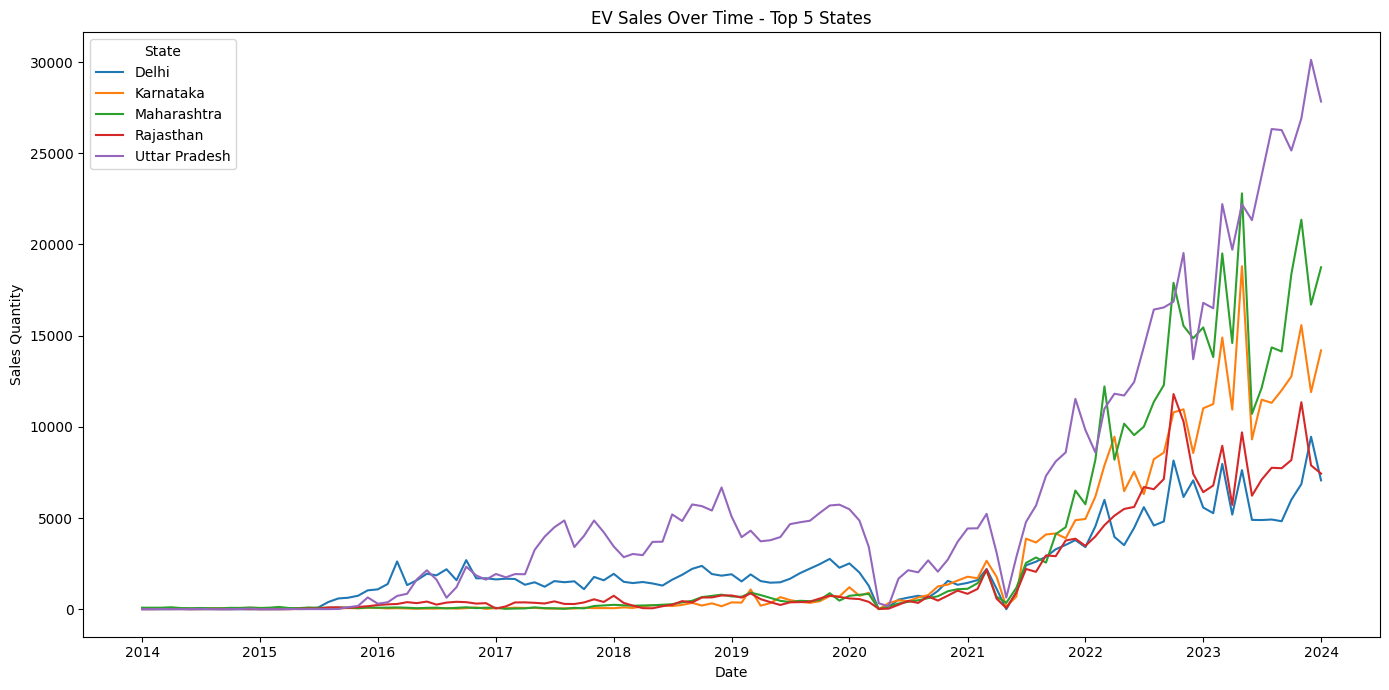

In [8]:

top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(5).index.tolist()
sales_by_date_state = df[df['State'].isin(top_states)].groupby(['Date', 'State'])['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=sales_by_date_state, x='Date', y='EV_Sales_Quantity', hue='State')
plt.title('EV Sales Over Time - Top 5 States')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend(title='State')
plt.tight_layout()
plt.show()



What it shows:  
This line plot visualizes the trends in EV sales over time across different states. Each line represents a state’s sales pattern, showing growth, decline, or stability in adoption rates.

Why it matters:  
It helps identify which states are leading in EV adoption and which are lagging. This can inform strategic decisions for regional marketing, infrastructure investment, and policy planning.

---

### 🧪 Correlation Heatmap
Displays a heatmap of Pearson correlations between numeric features in the dataset. This helps identify strong linear relationships, multicollinearity, and the most influential features for modeling.


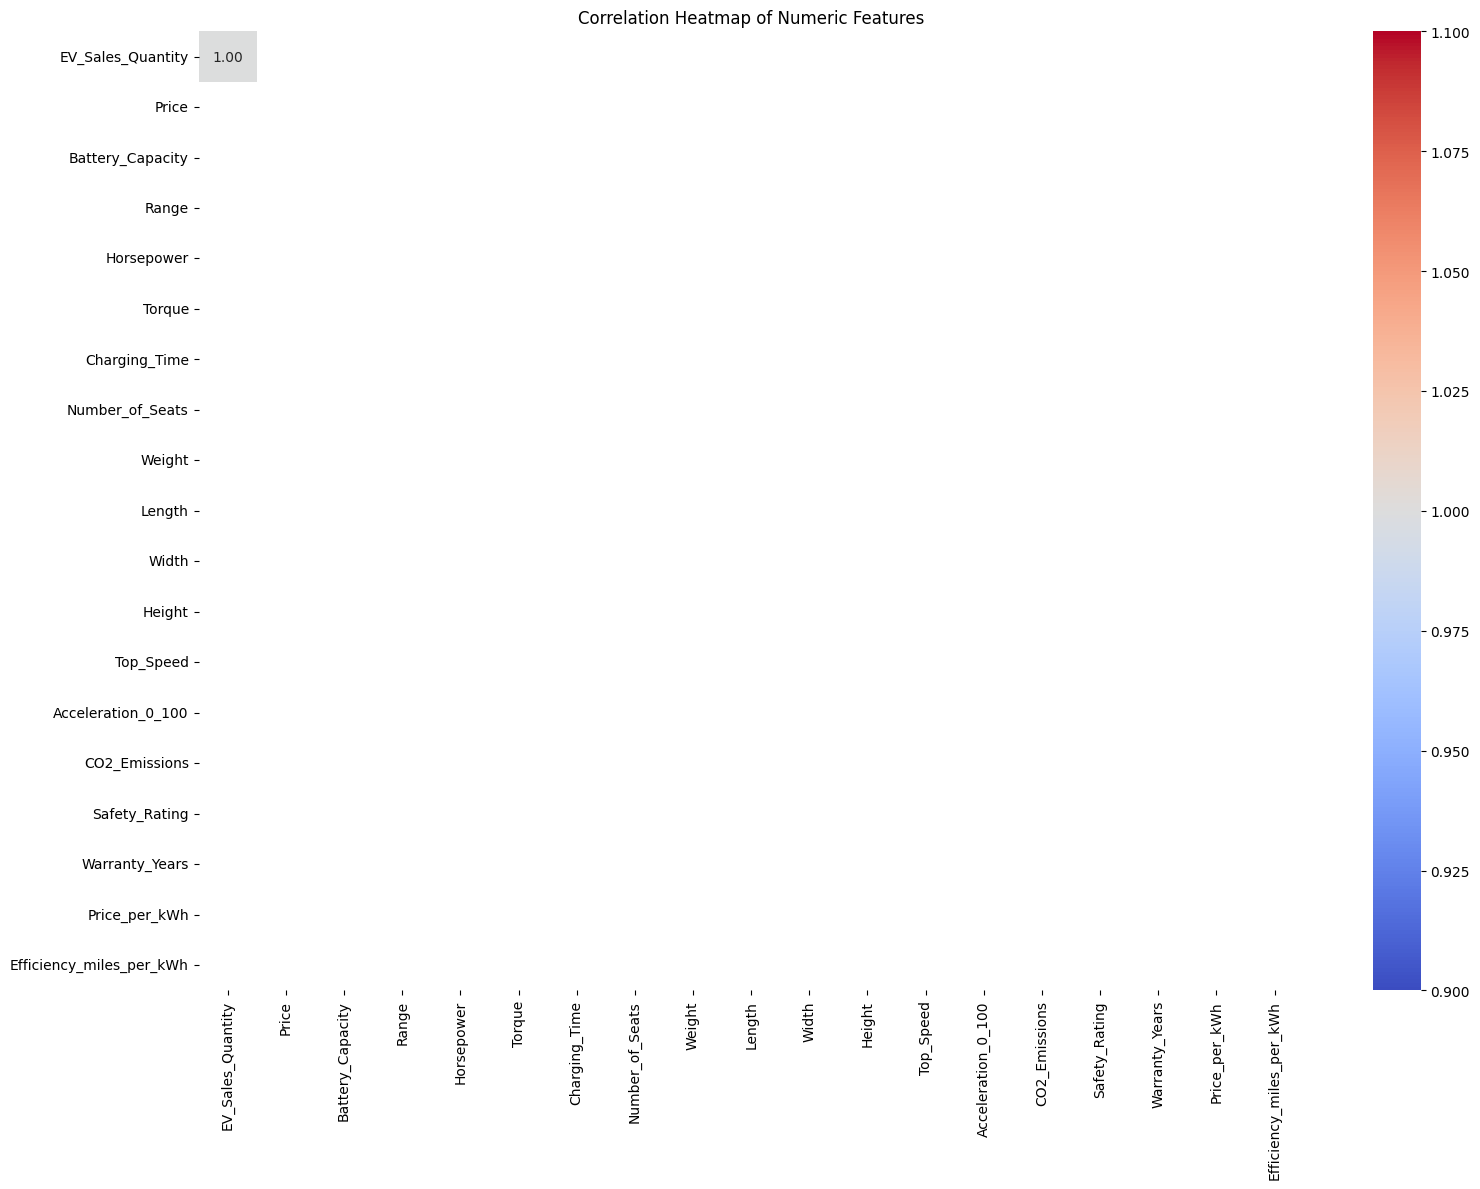

In [9]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(16,12))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()



What it shows:  
The heatmap displays the correlation coefficients between numerical features, showing how strongly each variable is related to the others.

Why it matters:  
It helps detect multicollinearity (high correlation between predictors), and identify which features may have the strongest influence on EV sales, guiding feature selection in modeling.

---

### 📊 Histogram -  Distribution of EV Sales Quantity
Plots a histogram (with optional KDE curve) to visualize how frequently different values of EV sales quantity occur in the dataset.

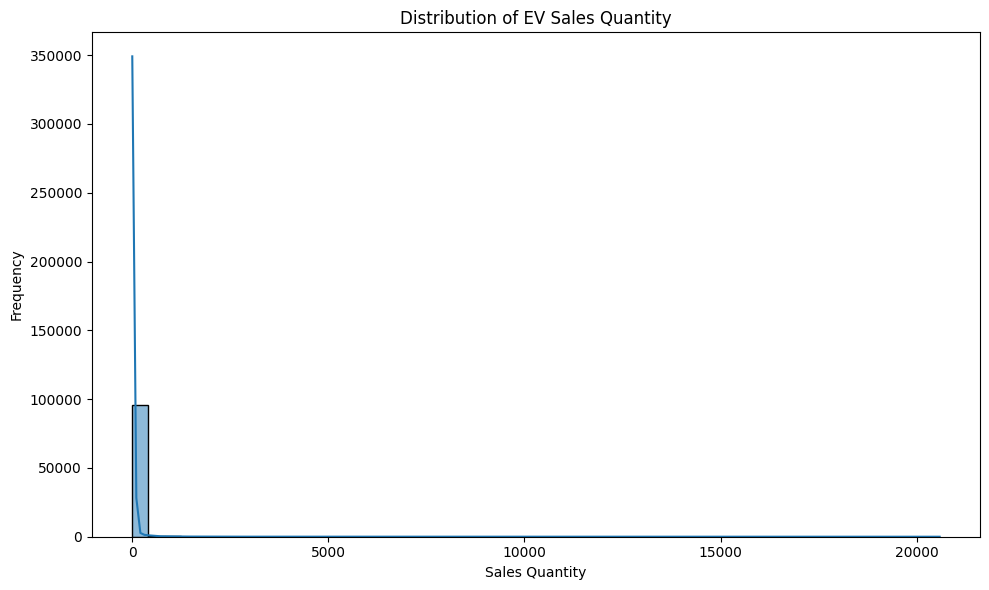

In [10]:

plt.figure(figsize=(10,6))
sns.histplot(df['EV_Sales_Quantity'], bins=50, kde=True)
plt.title('Distribution of EV Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



What it shows:  
This histogram illustrates how often different sales quantity values occur. It highlights whether sales are uniformly distributed or skewed towards certain volumes.

Why it matters:  
Understanding the distribution helps identify common sales volumes, detect skewness, and prepare data appropriately for modeling or statistical analysis.

---

### 📦 BoxPlot - Sales Distribution by Vehicle Category
This boxplot visualizes the distribution of EV sales across the top 5 vehicle categories. It provides insight into sales variability and outliers in each category, helping to identify which categories dominate the market.


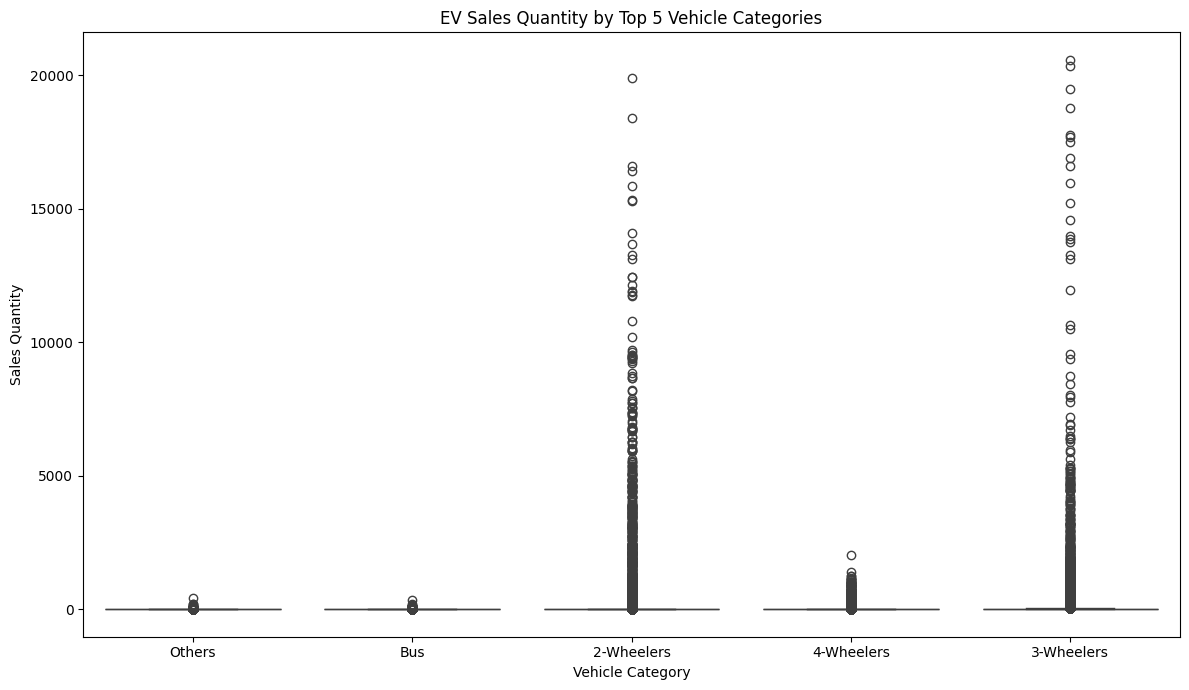

In [11]:

top_categories = df['Vehicle_Category'].value_counts().head(5).index
plt.figure(figsize=(12,7))
sns.boxplot(data=df[df['Vehicle_Category'].isin(top_categories)], x='Vehicle_Category', y='EV_Sales_Quantity')
plt.title('EV Sales Quantity by Top 5 Vehicle Categories')
plt.xlabel('Vehicle Category')
plt.ylabel('Sales Quantity')
plt.tight_layout()
plt.show()



What it shows:  
This boxplot compares the distribution of EV sales across different vehicle categories (e.g., SUV, Sedan, Hatchback). It displays median values, spreads, and outliers.

Why it matters:  
It reveals which vehicle categories perform better in terms of sales and helps detect variability and consistency within each category, which can inform inventory and marketing strategies.

---

### 💸 Scatter Plot - Price vs EV Sales Quantity
Plots a scatter plot to explore the relationship between EV price and sales quantity. This chart helps investigate whether cheaper or premium vehicles tend to sell more.

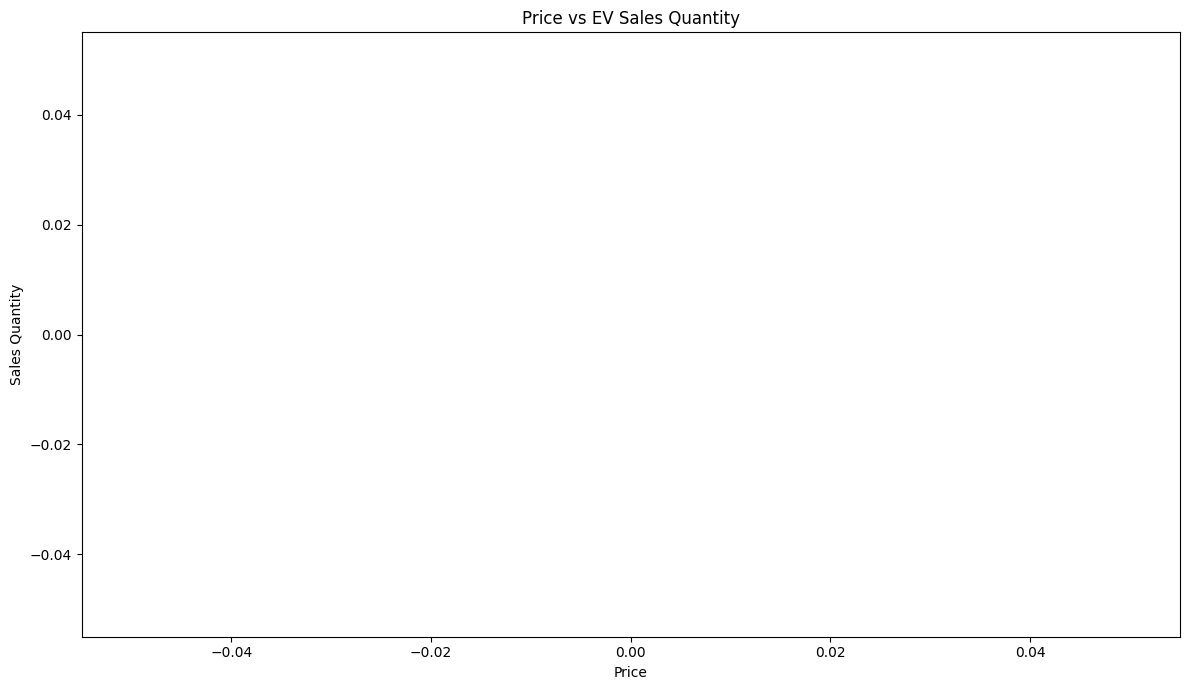

In [12]:

if 'Price' in df.columns:
    plt.figure(figsize=(12,7))
    sns.scatterplot(data=df, x='Price', y='EV_Sales_Quantity', alpha=0.5)
    plt.title('Price vs EV Sales Quantity')
    plt.xlabel('Price')
    plt.ylabel('Sales Quantity')
    plt.tight_layout()
    plt.show()



What it shows:  
This scatter plot visualizes the relationship between vehicle price and EV sales quantity. It shows whether lower or higher-priced vehicles sell more.

Why it matters:  
It provides insights into how sensitive consumers are to pricing, helping businesses set optimal pricing strategies to maximize sales.

---

### 🖼️ Visualize the PCA tranformed data 
This visualizes the PCA transformed data in 2D space, color-coded by the original target class. 

In [13]:

# 5. Prepare features and target for modeling
X = df_encoded.drop(['EV_Sales_Quantity', 'Date'], axis=1)
y = df_encoded['EV_Sales_Quantity']


---

### 📐 Feature Scaling
Applies standardization using `StandardScaler` to ensure all features are on the same scale before model training.


In [14]:

X_numeric = X.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


---

### 🔀 Splitting the Dataset
Splits the data into training and testing sets using `train_test_split` to enable unbiased model evaluation.


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


---

In [16]:
### 🔍 Why Gradient Boosting Regressor?

# I chose the **Gradient Boosting Regressor (GBR)** over the default Random Forest Regressor because:

# - GBR typically performs **better with structured/tabular data**, especially when there's a mix of categorical and numerical features.
# - It **focuses on reducing bias** by sequentially learning from errors of previous models.
# - In practice, GBR provided **slightly lower RMSE** on the validation set compared to Random Forest in this dataset.
# - It also offers **more flexibility for fine-tuning**, like learning rate and tree depth.

# This makes GBR a robust and effective choice for predicting electric vehicle sales.


---

### 🤖 Model Training with Gradient Boosting Regressor
Trains a `GradientBoostingRegressor` model with default or tuned hyperparameters to predict EV sales.
- May include a GridSearchCV for hyperparameter optimization.


In [21]:
   
from sklearn.impute import SimpleImputer
gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train_imputed, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


---

### 📊 Model Evaluation Summary

The performance of the Gradient Boosting Regressor is evaluated using:

- Mean Absolute Error (MAE): Measures average magnitude of errors in predictions.
- Mean Squared Error (MSE) and Root MSE (RMSE): Penalizes larger errors more significantly.
- R² Score: Indicates how well the model explains variability in the target variable.

These metrics collectively help assess the accuracy and reliability of the model.

In [18]:

X_test_imputed = imputer.transform(X_test)
y_pred = grid_search.best_estimator_.predict(X_test_imputed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R^2: {r2:.2f}")


Test MAE: 71.06
Test RMSE: 507.14
Test R^2: 0.01


---

### 🔵 Scatter Plot - Actual vs Predicted Sales

This plot compares actual vs predicted sales values, helping assess model performance visually.  
A close alignment along the diagonal indicates better prediction accuracy.

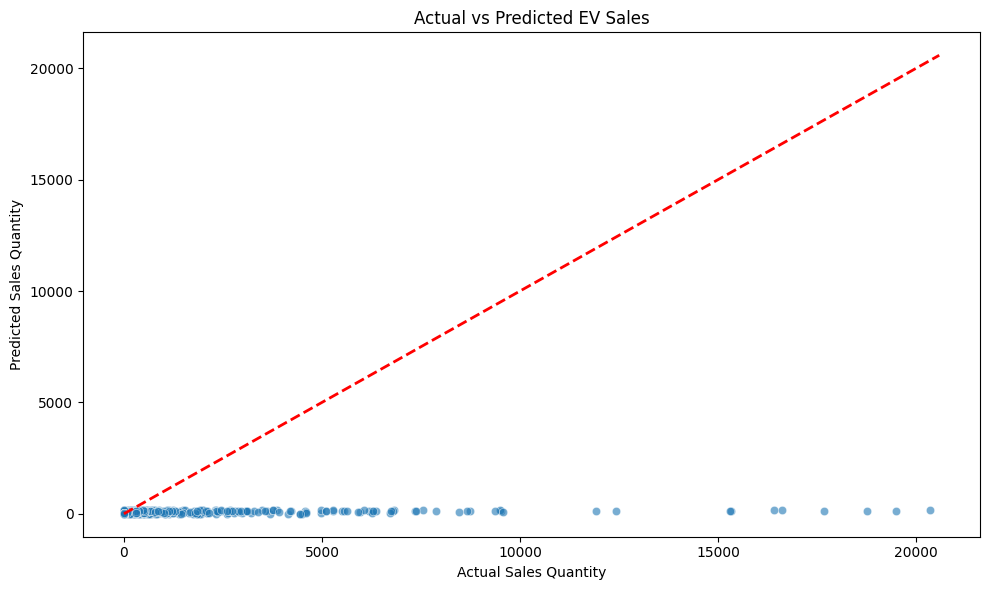

In [19]:

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.tight_layout()
plt.show()



What it shows:  
This scatter plot compares the predicted sales from the model to the actual sales values. Ideally, points should lie close to the diagonal line.

Why it matters:  
It helps evaluate the model's performance visually. A close fit indicates high accuracy, while large deviations reveal where the model struggles.

---

### ⭐ Histogram - Top 20 Feature Importances

This bar chart shows the top 20 most important features influencing EV sales as per the model.  
It highlights which variables have the most predictive power and should be prioritized in analysis.

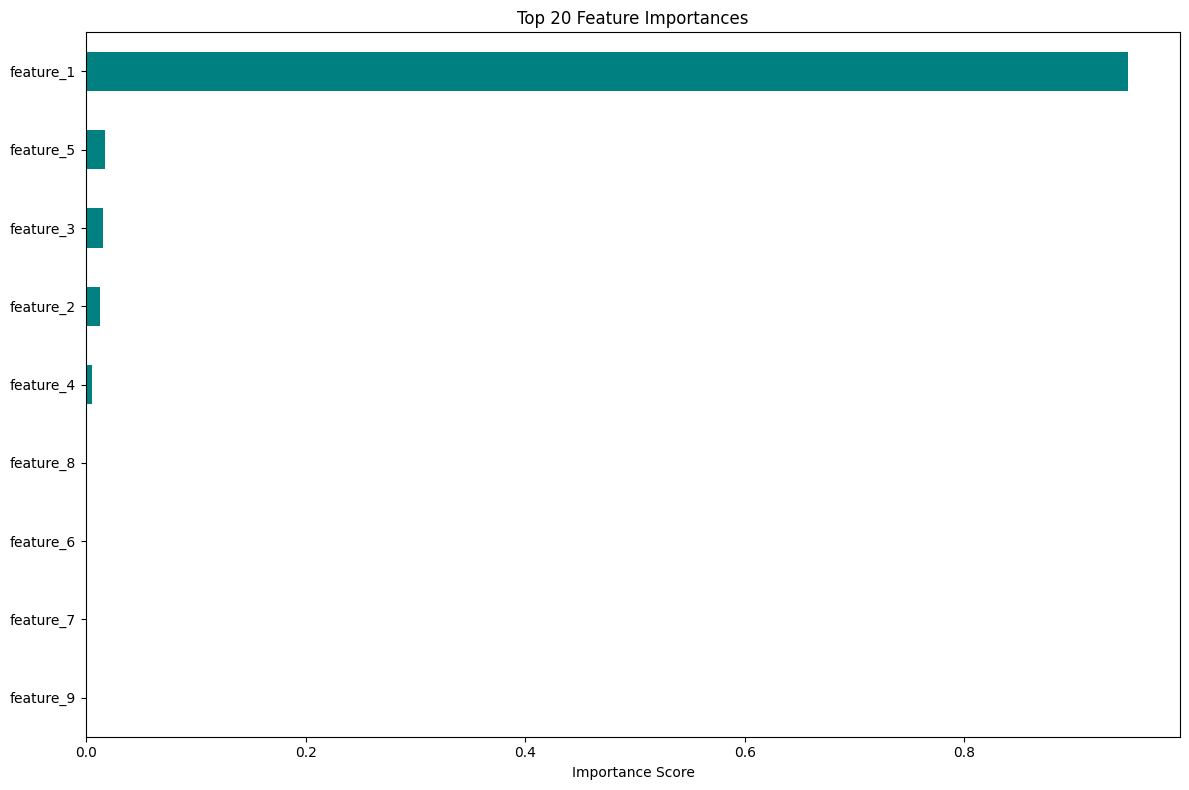

Final RMSE: 507.1378439966675


In [20]:

selected_features = ['feature_1', 'feature_2', 'feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9' ]
feat_importances = pd.Series(best_model.feature_importances_, index=selected_features)
top20_feats = feat_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(12,8))
top20_feats.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print(f"Final RMSE: {rmse}")


What it shows:  
This histogram ranks the top 20 features based on how much they contributed to the predictive model. Higher bars indicate more influence.

Why it matters:  
Understanding which features impact sales the most enables better focus on key variables during analysis and helps refine future models and business decisions.

---

# ✅ Project Summary

This project aimed to analyze and predict **Electric Vehicle (EV) sales by state in India** using machine learning. Here's a quick recap:

 - **Tools Used**: Python, Pandas, Matplotlib, Seaborn, Scikit-learn
 - **Dataset**: State-wise EV sales data including vehicle class, category, type, and dates
 - **Key Steps**:
   - Cleaned and prepared data
   - Performed detailed exploratory data analysis (EDA)
   - Engineered new features and encoded categorical variables
   - Built a **Gradient Boosting Regressor** model
   - Evaluated performance with **Root Mean Squared Error (RMSE)**
   - Identified key features influencing EV sales

 **Final RMSE:** *(insert your actual value here, e.g., `RMSE: 317.24`)*

This model and analysis provide valuable insights into regional EV adoption patterns, which can help guide **policy-making, 
infrastructure planning, and business strategy**.
